### Preprocessing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("all_data.csv", index_col = 0)

In [2]:
# Look at the data
data.head()

,recordnum,cardnum,date,merchnum,merch.description,merch.state,merch.zip,transtype,amount,fraud,...,merchnum_per_card_3,merchnum_per_card_7,zip_with_merchnum_14,state_with_merchnum_14,zip_with_merchnum_28,state_with_merchnum_28,cardnum_per_merch_14,cardnum_per_merch_28,merchnum_per_card_14,merchnum_per_card_28
1,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,NaN,...,1,1,1,1,1,1,1,1,1,1
2,2,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,NaN,...,1,1,1,1,1,1,1,1,1,1
3,3,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,NaN,...,1,1,1,1,1,1,1,1,1,1
4,4,5142152067,2010-01-01,5509006296254,FEDEX SHP 12/21/09 AB#,TN,38118,P,3.67,NaN,...,1,1,1,1,1,1,1,1,1,1
5,5,5142132941,2010-01-01,5509006296254,FEDEX SHP 12/27/09 AB#,TN,38118,P,3.62,NaN,...,1,1,1,1,1,1,2,2,1,1


In [3]:
# test for NAN
print pd.isnull(data).any()
# fill NAN with 0 in "fraud" column
data = data.fillna(0)
data.head()

recordnum                       False
cardnum                         False
date                            False
merchnum                        False
merch.description               False
merch.state                     False
merch.zip                       False
transtype                       False
amount                          False
fraud                            True
card_amount_to_avg_3            False
card_amount_to_max_3            False
card_amount_to_median_3         False
card_amount_to_total_3          False
merchant_amount_to_avg_3        False
merchant_amount_to_max_3        False
merchant_amount_to_median_3     False
merchant_amount_to_total_3      False
card_amount_to_avg_7            False
card_amount_to_max_7            False
card_amount_to_median_7         False
card_amount_to_total_7          False
merchant_amount_to_avg_7        False
merchant_amount_to_max_7        False
merchant_amount_to_median_7     False
merchant_amount_to_total_7      False
card_amount_

,recordnum,cardnum,date,merchnum,merch.description,merch.state,merch.zip,transtype,amount,fraud,...,merchnum_per_card_3,merchnum_per_card_7,zip_with_merchnum_14,state_with_merchnum_14,zip_with_merchnum_28,state_with_merchnum_28,cardnum_per_merch_14,cardnum_per_merch_28,merchnum_per_card_14,merchnum_per_card_28
1,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0.0,...,1,1,1,1,1,1,1,1,1,1
2,2,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0.0,...,1,1,1,1,1,1,1,1,1,1
3,3,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0.0,...,1,1,1,1,1,1,1,1,1,1
4,4,5142152067,2010-01-01,5509006296254,FEDEX SHP 12/21/09 AB#,TN,38118,P,3.67,0.0,...,1,1,1,1,1,1,1,1,1,1
5,5,5142132941,2010-01-01,5509006296254,FEDEX SHP 12/27/09 AB#,TN,38118,P,3.62,0.0,...,1,1,1,1,1,1,2,2,1,1


In [4]:
# only keep the data after 28 days
df = data[data["date"]>"2010-01-28"]
# only extract the label and features columns
df = df.iloc[:,9:]
print df.shape
df.head()

(88621, 59)


,fraud,card_amount_to_avg_3,card_amount_to_max_3,card_amount_to_median_3,card_amount_to_total_3,merchant_amount_to_avg_3,merchant_amount_to_max_3,merchant_amount_to_median_3,merchant_amount_to_total_3,card_amount_to_avg_7,...,merchnum_per_card_3,merchnum_per_card_7,zip_with_merchnum_14,state_with_merchnum_14,zip_with_merchnum_28,state_with_merchnum_28,cardnum_per_merch_14,cardnum_per_merch_28,merchnum_per_card_14,merchnum_per_card_28
6387,0.0,0.667055,0.667055,0.667055,0.667055,0.065900,0.065900,0.065900,0.065900,0.667055,...,1,1,1,1,1,1,1,2,2,2
6388,0.0,0.050678,0.050678,0.050678,0.050678,0.535842,0.535842,0.535842,0.535842,0.038454,...,1,2,1,1,1,1,1,1,3,6
6389,0.0,3.743966,2.065000,3.743966,1.871983,1.000000,0.000000,1.000000,0.000000,6.807755,...,2,6,1,1,1,1,1,1,8,10
6390,0.0,0.740060,0.456971,0.740060,0.370030,1.000000,0.000000,1.000000,0.000000,1.103021,...,2,3,1,1,1,1,1,1,3,5
6391,0.0,0.192225,0.192225,0.192225,0.192225,0.230989,0.069375,0.324845,0.015399,0.192225,...,1,1,1,1,1,1,24,38,4,8


In [5]:
# split lables and features
labels = df["fraud"]
features = df.iloc[:,1:]

print sum(labels)
print len(labels)
print sum(labels)/len(labels)

295.0
88621
0.00332878211711


In [6]:
# import neccessary sklearn packages
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.base import clone

In [7]:
# pre-process dataset with z-scaling
df[df.columns[1:]] = scale(df[df.columns[1:]])
features = scale(features)

In [8]:
df

,fraud,card_amount_to_avg_3,card_amount_to_max_3,card_amount_to_median_3,card_amount_to_total_3,merchant_amount_to_avg_3,merchant_amount_to_max_3,merchant_amount_to_median_3,merchant_amount_to_total_3,card_amount_to_avg_7,...,merchnum_per_card_3,merchnum_per_card_7,zip_with_merchnum_14,state_with_merchnum_14,zip_with_merchnum_28,state_with_merchnum_28,cardnum_per_merch_14,cardnum_per_merch_28,merchnum_per_card_14,merchnum_per_card_28
6387,0.0,-0.069713,-0.048956,-0.091941,-0.038273,-0.201987,-0.094556,-0.220692,-0.077500,-0.059868,...,-0.543365,-0.710861,-0.140425,-0.047599,-0.145302,-0.055944,-0.550043,-0.575982,-0.618471,-0.788860
6388,0.0,-0.087416,-0.066921,-0.108029,-0.057062,-0.133731,-0.022105,-0.162222,-0.002350,-0.078011,...,-0.543365,-0.388492,-0.140425,-0.047599,-0.145302,-0.055944,-0.550043,-0.609694,-0.418964,-0.294452
6389,0.0,0.018664,-0.008213,-0.011633,-0.001544,-0.066316,-0.104716,-0.104471,-0.088039,0.117367,...,0.015825,0.900980,-0.140425,-0.047599,-0.145302,-0.055944,-0.550043,-0.609694,0.578570,0.199956
6390,0.0,-0.067616,-0.055079,-0.090036,-0.047327,-0.066316,-0.104716,-0.104471,-0.088039,-0.047285,...,0.015825,-0.066124,-0.140425,-0.047599,-0.145302,-0.055944,-0.550043,-0.609694,-0.418964,-0.418054
6391,0.0,-0.083351,-0.062795,-0.104334,-0.052747,-0.178009,-0.094020,-0.188474,-0.085576,-0.073573,...,-0.543365,-0.710861,-0.140425,-0.047599,-0.145302,-0.055944,0.408327,0.637655,-0.219457,-0.047248
6392,0.0,-0.071883,-0.056158,-0.093913,-0.049592,-0.117387,-0.094627,-0.106166,-0.086819,-0.056506,...,-0.543365,-0.710861,-0.140425,-0.047599,-0.145302,-0.055944,1.241691,1.480458,-0.817978,-0.788860
6393,0.0,-0.069205,-0.056158,-0.083251,-0.051649,-0.117000,-0.094627,-0.105324,-0.086828,-0.055660,...,-0.543365,-0.710861,-0.140425,-0.047599,-0.145302,-0.055944,1.241691,1.480458,-0.817978,-0.788860
6394,0.0,-0.060150,-0.068398,-0.083251,-0.058607,-0.113472,-0.094293,-0.100346,-0.086798,-0.069245,...,-0.543365,-0.388492,-0.140425,-0.047599,-0.145302,-0.055944,1.241691,1.480458,-0.618471,-0.418054
6395,0.0,-0.078011,-0.057377,-0.099482,-0.047081,-0.066316,-0.104716,-0.104471,-0.088039,-0.068208,...,-0.543365,-0.710861,-0.140425,-0.047599,-0.145302,-0.055944,-0.550043,-0.609694,-0.817978,-0.541656
6396,0.0,-0.060150,-0.068398,-0.083251,-0.058607,0.189849,0.321364,0.114972,0.353919,-0.050259,...,-0.543365,-0.710861,-0.140425,-0.047599,-0.145302,-0.055944,-0.508374,-0.575982,-0.618471,-0.170850


In [9]:
features

array([[-0.06971252, -0.04895621, -0.09194127, ..., -0.57598233,
        -0.61847095, -0.7888601 ],
       [-0.0874164 , -0.06692074, -0.10802883, ..., -0.60969448,
        -0.41896412, -0.29445187],
       [ 0.01866391, -0.00821262, -0.0116334 , ..., -0.60969448,
         0.57857004,  0.19995636],
       ..., 
       [-0.08259652, -0.06606494, -0.0862946 , ..., -0.60969448,
         0.37906321,  1.18877282],
       [-0.07807729, -0.05822039, -0.09985196, ..., -0.37370947,
        -0.01995046,  0.19995636],
       [ 0.06589752, -0.02718865,  0.39801868, ...,  0.87363986,
        -0.21945729,  0.44716047]])

In [16]:
# train-testing split with 2 to 1 proportion
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33333, random_state=10)
print "Training set:"
print "Number of Frauds: ",
print sum(y_train)
print "Total number of records: ",
print len(y_train)
print "Fraud rate: ",
print sum(y_train) / len(y_train)
print "\nTesting set:"
print "Number of Frauds: ",
print sum(y_test)
print "Total number of records: ",
print len(y_test)
print "Fraud rate: ",
print sum(y_test) / len(y_test)

Training set:
Number of Frauds:  197.0
Total number of records:  59080
Fraud rate:  0.00333446174678

Testing set:
Number of Frauds:  98.0
Total number of records:  29541
Fraud rate:  0.00331742324227


### Feature Selction Based on Mutual Information

[ 0.00029713  0.00047194  0.00087575  0.00056817  0.00218957  0.00241462
  0.00241916  0.00243713  0.00053093  0.00071422  0.00112633  0.00051721
  0.00155164  0.00320292  0.00199928  0.00192407  0.00054404  0.00094106
  0.00136049  0.00039731  0.00157583  0.00286045  0.00224094  0.00181012
  0.00092697  0.00142364  0.00158592  0.00016706  0.00153347  0.00312032
  0.00313229  0.00167577  0.00603275  0.00634033  0.00609795  0.00549229
  0.00629109  0.00424737  0.00417627  0.0046088   0.00444657  0.00338676
  0.00329639  0.00064394  0.0057244   0.00068812  0.00444254  0.00591371
  0.00527331  0.0030266   0.00579793  0.00082631  0.00577743  0.00100471
  0.00542328  0.00480965  0.00279098  0.00238738]


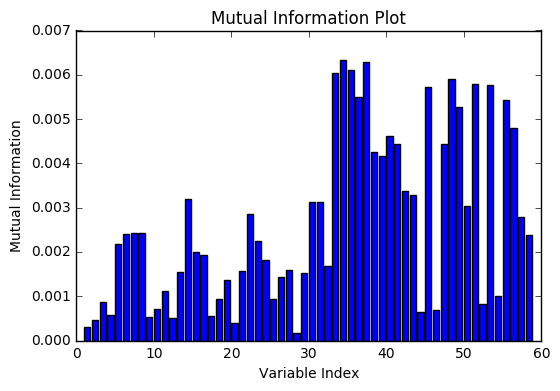

In [10]:
# MI feature selection
MI = mutual_info_classif(features,labels)
print MI

%matplotlib inline
plt.bar(range(1,len(MI)+1), MI)
plt.title("Mutual Information Plot")
plt.xlabel("Variable Index")
plt.ylabel("Mutual Information")

In [11]:
# select only variables with MI larger than 0.003
selected = np.array(range(len(MI)))[MI > 0.003]
features_sub = features[:,selected]
clf = LogisticRegression()
clf.fit(features_sub, labels)
score = clf.score(features_sub, labels)
print "Accuracy score is", score

predictions = clf.predict(features_sub)
print "AUC score is", roc_auc_score(labels, predictions)

matrix = confusion_matrix(labels, predictions)
print "FDR is", matrix[1,1]/sum(labels)

Accuracy score is 0.996851761998
AUC score is 0.56428224102
FDR is 0.128813559322


In [23]:
def mi_selection(threshold):
    '''
    threshold: threshold on the MI to select features
    output: AUC score
    '''
    selected = np.array(range(len(MI)))[MI > threshold]
    features_sub = X_train[:,selected]
    clf = LogisticRegression()
    clf.fit(features_sub, y_train)
    predictions_train = clf.predict(features_sub)
    predictions_test = clf.predict(X_test[:,selected])
    return (roc_auc_score(y_train, predictions_train), roc_auc_score(y_test, predictions_test))

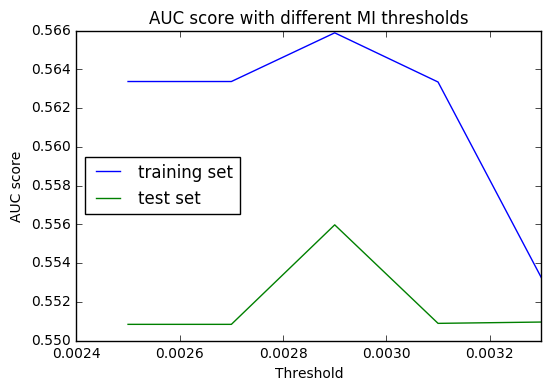

In [29]:
threshold_lst = np.arange(0.0025, 0.0035, 0.0002)
auc_list_train = []
auc_list_test = []
for threshold in threshold_lst:
    auc_list_train.append(mi_selection(threshold)[0])
    auc_list_test.append(mi_selection(threshold)[1])
    
plt.plot(threshold_lst, auc_list_train, label="training set")
plt.plot(threshold_lst, auc_list_test, label="test set")
plt.title("AUC score with different MI thresholds")
plt.xlabel("Threshold")
plt.ylabel("AUC score")
plt.legend(loc="center left")
plt.show()

In [37]:
def mi_selection(threshold, clf):
    '''
    threshold: threshold on the MI to select features
    clf: classifier used
    output: AUC score
    '''
    clf_clone = clone(clf)
    selected = np.array(range(len(MI)))[MI > threshold]
    features_sub = X_train[:,selected]
    clf_clone.fit(features_sub, y_train)
    predictions_train = clf_clone.predict(features_sub)
    predictions_test = clf_clone.predict(X_test[:,selected])
    return (roc_auc_score(y_train, predictions_train), roc_auc_score(y_test, predictions_test))

def mi_plot(threshold_lst, clf, plot_title, location):
    auc_list_train = []
    auc_list_test = []
    for threshold in threshold_lst:
        auc_list_train.append(mi_selection(threshold, clf)[0])
        auc_list_test.append(mi_selection(threshold, clf)[1])
    
    plt.plot(threshold_lst, auc_list_train, label="training set")
    plt.plot(threshold_lst, auc_list_test, label="test set")
    plt.title(plot_title)
    plt.xlabel("Threshold")
    plt.ylabel("AUC score")
    plt.legend(loc=location)
    plt.show()

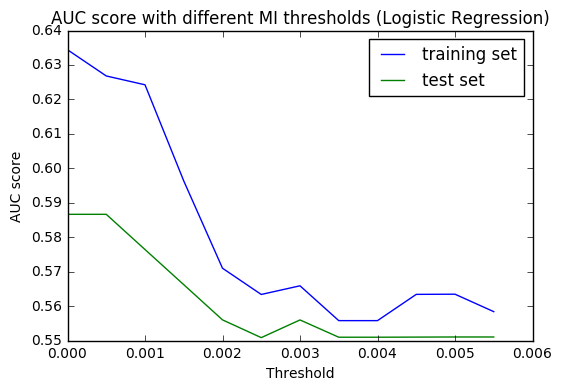

In [45]:
clf = LogisticRegression()
threshold_lst = np.arange(0, 0.006, 0.0005)
mi_plot(threshold_lst, clf, "AUC score with different MI thresholds (Logistic Regression)", "upper right")

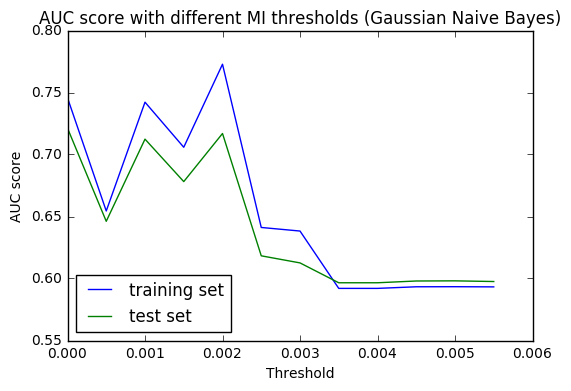

In [39]:
clf = GaussianNB()
threshold_lst = np.arange(0, 0.006, 0.0005)
mi_plot(threshold_lst, clf, "AUC score with different MI thresholds (Gaussian Naive Bayes)", "lower left")

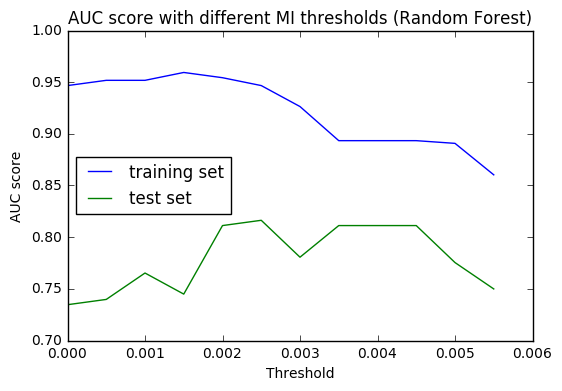

In [41]:
clf = RandomForestClassifier(n_estimators = 25, max_depth = 20, min_samples_split = 5, random_state = 42, n_jobs = 3)
threshold_lst = np.arange(0, 0.006, 0.0005)
mi_plot(threshold_lst, clf, "AUC score with different MI thresholds (Random Forest)", "center left")

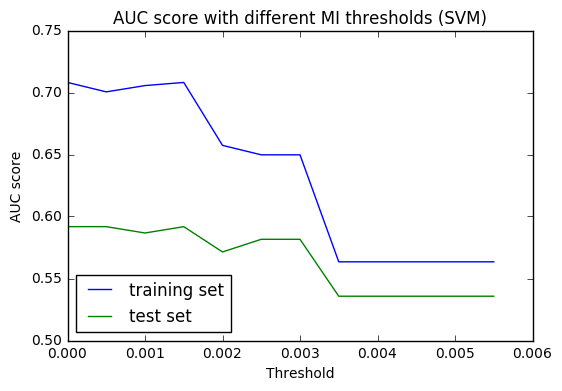

In [42]:
clf = SVC()
threshold_lst = np.arange(0, 0.006, 0.0005)
mi_plot(threshold_lst, clf, "AUC score with different MI thresholds (SVM)", "lower left")

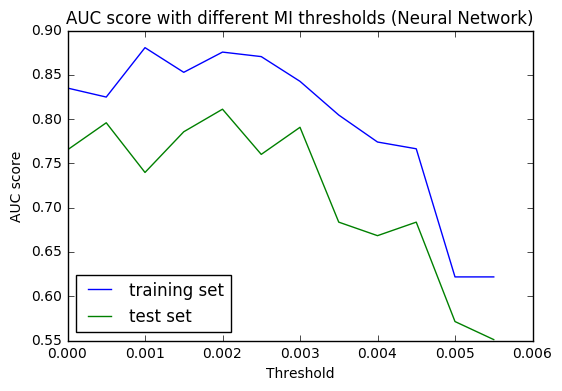

In [43]:
clf = MLPClassifier()
threshold_lst = np.arange(0, 0.006, 0.0005)
mi_plot(threshold_lst, clf, "AUC score with different MI thresholds (Neural Network)", "lower left")

In [48]:
print len(np.array(range(len(MI)))[MI > 0.003])
print len(np.array(range(len(MI)))[MI > 0.004])
print len(np.array(range(len(MI)))[MI > 0.005])

23
17
11


In [51]:
df.columns.values[[i+1 for i in np.array(range(len(MI)))[MI > 0.005]]]

array(['merchDaily', 'merchLag3Cum', 'merchLag7Cum', 'merchLag14Cum',
       'merchLag28Cum', 'zip_with_merchnum_7', 'cardnum_per_merch_7',
       'merchnum_per_card_3', 'zip_with_merchnum_14',
       'zip_with_merchnum_28', 'cardnum_per_merch_14'], dtype=object)

In [52]:
MI[np.array(range(len(MI)))[MI > 0.005]]

array([ 0.00603275,  0.00634033,  0.00609795,  0.00549229,  0.00629109,
        0.0057244 ,  0.00591371,  0.00527331,  0.00579793,  0.00577743,
        0.00542328])

In [49]:
# select only variables with MI larger than 0.005
selected = np.array(range(len(MI)))[MI > 0.005]
features_sub = features[:,selected]

clf = GaussianNB()
clf.fit(features_sub, labels)
score = clf.score(features_sub, labels)
print "_________NB________"
print "Accuracy score is", score
predictions = clf.predict(features_sub)
print "AUC score is", roc_auc_score(labels, predictions)
matrix = confusion_matrix(labels, predictions)
print "FDR is", matrix[1,1]/sum(labels)

clf = LogisticRegression()
clf.fit(features_sub, labels)
score = clf.score(features_sub, labels)
print "_________LR________"
print "Accuracy score is", score
predictions = clf.predict(features_sub)
print "AUC score is", roc_auc_score(labels, predictions)
matrix = confusion_matrix(labels, predictions)
print "FDR is", matrix[1,1]/sum(labels)

clf = RandomForestClassifier(n_estimators = 25, max_depth = 20, min_samples_split = 5, random_state = 42, n_jobs = 3)
clf.fit(features_sub, labels)
score = clf.score(features_sub, labels)
print "_________RF________"
print "Accuracy score is", score
predictions = clf.predict(features_sub)
print "AUC score is", roc_auc_score(labels, predictions)
matrix = confusion_matrix(labels, predictions)
print "FDR is", matrix[1,1]/sum(labels)

clf = SVC()
clf.fit(features_sub, labels)
score = clf.score(features_sub, labels)
print "_________SVM________"
print "Accuracy score is", score
predictions = clf.predict(features_sub)
print "AUC score is", roc_auc_score(labels, predictions)
matrix = confusion_matrix(labels, predictions)
print "FDR is", matrix[1,1]/sum(labels)

clf = MLPClassifier()
clf.fit(features_sub, labels)
score = clf.score(features_sub, labels)
print "_________NN________"
print "Accuracy score is", score
predictions = clf.predict(features_sub)
print "AUC score is", roc_auc_score(labels, predictions)
matrix = confusion_matrix(labels, predictions)
print "FDR is", matrix[1,1]/sum(labels)

_________NB________
Accuracy score is 0.960381850803
AUC score is 0.594974760297
FDR is 0.227118644068
_________LR________
Accuracy score is 0.996998454091
AUC score is 0.559288068814
FDR is 0.118644067797
_________RF________
Accuracy score is 0.999085995419
AUC score is 0.896496952545
FDR is 0.793220338983
_________SVM________
Accuracy score is 0.997088726148
AUC score is 0.562711864407
FDR is 0.125423728814
_________NN________
Accuracy score is 0.997370826328
AUC score is 0.615220272204
FDR is 0.230508474576


### Forward Feature Selection

In [11]:
# forward selection algorithm
def forward_selection(feature, label, clf, criteria):
    '''
    feature: ndarray of all the feature
    label: series of fraud label
    clf: classifier
    criteria: "accuracy", "AUC" or "FDR"
    
    print the whole feature selection process and feature selected in the end
    
    return the index list of features selected
    '''
    
    # initialize counter and comparison flag
    max_accuracy = 0
    added_features = []
    count = 0
    print "Starting........ Selection criteria is {crit}, baseline score is {baseline}".format(
        crit = criteria,
        baseline = max_accuracy)
    # loop until all the new models give a worse result
    while True:
        count += 1
        accuracy = {}
        # feature_lst is the list for all the feature indice except those features have been selected in previous round
        feature_lst = [i for i in range(feature.shape[1]) if i not in added_features]
        # add one feature in feature_list each time
        for i in feature_lst:
            feature_sub = feature[:,added_features+[i]]
            if count == 1:
                # change the shape of ndarray to make it acceptable for sklearn
                feature_sub = feature_sub.reshape(feature_sub.shape[0],1)
            # loop over to create a dict accuracy with feature index as key, and correponding accuracy as value
            clf_clone = clone(clf)
            clf_clone.fit(feature_sub, label)
            if criteria == "accuracy":
                accuracy[i] = clf_clone.score(feature_sub, label)
            elif criteria == "AUC":
                prediction = clf_clone.predict(feature_sub)
                accuracy[i] = roc_auc_score(label, prediction)
            elif criteria == "FDR":
                prediction = clf_clone.predict(feature_sub)
                matrix = confusion_matrix(label, prediction)
                accuracy[i] = matrix[1,1]/sum(label)
        # when the accuracy dict is empty, indicating it's the last round with no left features, end the loop
        if accuracy == {}:
            print "Forward selection ended."
            print "Selected features are ",
            print final_feature_lst
            return feature_index
            break
        # if it's not the last round, calculate the best result in current round
        current_max = max(accuracy.values())
        # if a not worse best result is generated, update added_features list
        if current_max >= max_accuracy:
            max_index = accuracy.keys()[accuracy.values().index(current_max)]
            added_features.append(max_index)
            feature_name = df.columns.values[max_index+1]
            # do not updated the final_feature_list until a better result is generated (always make sure fewer features)
            if current_max > max_accuracy:
                final_feature_lst = list(df.columns.values[[i+1 for i in added_features]])
                feature_index = list(added_features)
            # update maximum record
            max_accuracy = current_max
            print "Round number: {count_num}, the added feature is: {feature_selected}, maximum score is: {max_acc}\n".format(
            count_num = count,
            feature_selected = feature_name,
            max_acc = max_accuracy)
        # otherwise, all the results are worse, end the loop
        else:
            print "Forward selection ended."
            print "Selected features are ",
            print final_feature_lst
            return feature_index
            break

In [50]:
def test_comparison(feature_selected, clf):
    X_train_sub = X_train[:,feature_selected]
    clf.fit(X_train_sub, y_train)
    prediction_train = clf.predict(X_train_sub)
    matrix = confusion_matrix(y_train, prediction_train)
    train_acc = clf.score(X_train_sub, y_train)
    train_auc = roc_auc_score(y_train, prediction_train)
    train_fdr = matrix[1,1]/sum(y_train)
    
    X_test_sub = X_test[:,feature_selected]
    prediction_test = clf.predict(X_test_sub)
    matrix = confusion_matrix(y_test, prediction_test)
    test_acc = clf.score(X_test_sub, y_test)
    test_auc = roc_auc_score(y_test, prediction_test)
    test_fdr = matrix[1,1]/sum(y_test)
    
    comparison_df = pd.DataFrame({ "Accuracy": [train_acc, test_acc],
                                  "AUC score": [train_auc, test_auc],
                                  "FDR": [train_fdr, test_fdr]},
                                 index = ["Training", "Testing"])
    return comparison_df

### Gaussian Naive Bayes

In [13]:
clf = GaussianNB()
criteria = "AUC"
NB_features = forward_selection(X_train, y_train, clf, criteria)

Starting........ Selection criteria is AUC, baseline score is 0
Round number: 1, the added feature is: zip_with_merchnum_7, maximum score is: 0.600636287171

Round number: 2, the added feature is: card_amount_to_median_28, maximum score is: 0.658679894424

Round number: 3, the added feature is: merchant_amount_to_median_28, maximum score is: 0.687871526354

Round number: 4, the added feature is: state_with_merchnum_3, maximum score is: 0.748679886665

Round number: 5, the added feature is: merchLag3Cum, maximum score is: 0.826053877297

Round number: 6, the added feature is: cardLag7Cum, maximum score is: 0.851074629539

Forward selection ended.
Selected features are  ['zip_with_merchnum_7', 'card_amount_to_median_28', 'merchant_amount_to_median_28', 'state_with_merchnum_3', 'merchLag3Cum', 'cardLag7Cum']


In [51]:
clf = GaussianNB()
test_comparison(NB_features, clf)

,AUC score,Accuracy,FDR
Training,0.851075,0.884665,0.817259
Testing,0.800066,0.885278,0.714286


**Gaussian Naive Bayes** Classifer does moderately well, and does not seem to suffer a lot from overfitting.

In [108]:
features_sub = df[['zip_with_merchnum_7', 'card_amount_to_median_28', 'merchant_amount_to_median_28', 'state_with_merchnum_3', 'merchLag3Cum', 'cardLag7Cum']]
clf = GaussianNB()
clf.fit(features_sub, labels)
print "accuracy is", clf.score(features_sub, labels)
prediction = clf.predict(features_sub)
matrix = confusion_matrix(labels, prediction)
print "\n"
print matrix
print "\n"
print  "FDR is", matrix[1,1]/sum(labels)

accuracy is 0.783414766252


[[69181 19145]
 [   49   246]]


FDR is 0.833898305085


### Logistic Regression

In [16]:
clf = LogisticRegression()
criteria = "AUC"
LR_features = forward_selection(X_train, y_train, clf, criteria)

Starting........ Selection criteria is AUC, baseline score is 0
Round number: 1, the added feature is: zip_with_merchnum_14, maximum score is: 0.56345177665

Round number: 2, the added feature is: card_amount_to_median_7, maximum score is: 0.568527918782

Round number: 3, the added feature is: card_amount_to_max_3, maximum score is: 0.5786547288

Round number: 4, the added feature is: card_amount_to_avg_28, maximum score is: 0.581192799866

Round number: 5, the added feature is: state_with_merchnum_7, maximum score is: 0.583730870932

Round number: 6, the added feature is: cardDaily, maximum score is: 0.583739362347

Round number: 7, the added feature is: merchant_amount_to_median_3, maximum score is: 0.583739362347

Round number: 8, the added feature is: merchant_amount_to_max_7, maximum score is: 0.583739362347

Round number: 9, the added feature is: cardLag7Cum, maximum score is: 0.583747853762

Round number: 10, the added feature is: card_amount_to_total_3, maximum score is: 0.5837

In [123]:
clf = LogisticRegression()
test_comparison(LR_features, clf)

,AUC score,Accuracy,FDR
Training,0.639526,0.997461,0.279188
Testing,0.576463,0.997055,0.153061


**Logistic Regression Model** performs poor. Althrough it's accuracy is not very low, it missed many frauds.

In [124]:
features_sub = df[['zip_with_merchnum_14', 'card_amount_to_median_7', 'card_amount_to_max_3', 'card_amount_to_avg_28', 'state_with_merchnum_7', 'cardDaily', 'merchant_amount_to_median_3', 'merchant_amount_to_max_7', 'cardLag7Cum', 'card_amount_to_total_3', 'card_amount_to_max_14', 'merchant_amount_to_avg_14', 'merchant_amount_to_max_28', 'merchant_amount_to_avg_28', 'merchant_amount_to_median_28', 'merchLag7Cum', 'merchnum_per_card_28', 'merchLag14Cum', 'state_with_merchnum_28', 'merchant_amount_to_median_7', 'card_amount_to_max_28', 'merchant_amount_to_total_7', 'merchant_amount_to_avg_3', 'card_amount_to_avg_3', 'card_amount_to_median_3', 'card_amount_to_max_7', 'card_amount_to_median_14', 'card_amount_to_total_7', 'merchant_amount_to_max_14', 'merchant_amount_to_total_3', 'card_amount_to_median_28', 'card_amount_to_total_28', 'merchDaily', 'merchLag28Cum', 'cardLag14Cum', 'zip_with_merchnum_3', 'state_with_merchnum_3', 'merchnum_per_card_3', 'zip_with_merchnum_28', 'merchnum_per_card_14', 'merchLag3Cum', 'card_amount_to_avg_7']]
clf = LogisticRegression()
clf.fit(features_sub, labels)
print "accuracy is", clf.score(features_sub, labels)
prediction = clf.predict(features_sub)
matrix = confusion_matrix(labels, prediction)
print "\n"
print matrix
print "\n"
print  "FDR is", matrix[1,1]/sum(labels)

accuracy is 0.99728055427


[[88312    14]
 [  227    68]]


FDR is 0.230508474576


In [36]:
# poor FDR, what if we set FDR as forward selection criteria
clf = LogisticRegression()
criteria = "FDR"
LR_features_fdr = forward_selection(X_train, y_train, clf, criteria)

Starting........ Selection criteria is FDR, baseline score is 0
Round number: 1, the added feature is: zip_with_merchnum_14, maximum score is: 0.126903553299

Round number: 2, the added feature is: card_amount_to_median_7, maximum score is: 0.137055837563

Round number: 3, the added feature is: card_amount_to_avg_3, maximum score is: 0.157360406091

Round number: 4, the added feature is: card_amount_to_avg_28, maximum score is: 0.162436548223

Round number: 5, the added feature is: state_with_merchnum_7, maximum score is: 0.167512690355

Round number: 6, the added feature is: card_amount_to_max_3, maximum score is: 0.167512690355

Round number: 7, the added feature is: card_amount_to_avg_7, maximum score is: 0.182741116751

Round number: 8, the added feature is: card_amount_to_median_28, maximum score is: 0.203045685279

Round number: 9, the added feature is: card_amount_to_total_14, maximum score is: 0.208121827411

Round number: 10, the added feature is: card_amount_to_total_3, maxim

In [110]:
clf = LogisticRegression()
test_comparison(LR_features_fdr, clf)

,AUC score,Accuracy,FDR
Training,0.642030,0.997410,0.284264
Testing,0.581531,0.997021,0.163265


When you set FDR as the criteria, performance does not improve much, so just stick to AUC criteria.

In [111]:
features_sub = df[['zip_with_merchnum_14', 'card_amount_to_median_7', 'card_amount_to_avg_3', 'card_amount_to_avg_28', 'state_with_merchnum_7', 'card_amount_to_max_3', 'card_amount_to_avg_7', 'card_amount_to_median_28', 'card_amount_to_total_14', 'card_amount_to_total_3', 'merchant_amount_to_avg_3', 'merchant_amount_to_max_3', 'merchant_amount_to_median_3', 'merchant_amount_to_total_3', 'merchant_amount_to_avg_7', 'merchant_amount_to_max_7', 'merchant_amount_to_median_7', 'merchant_amount_to_total_7', 'merchant_amount_to_median_28', 'merchant_amount_to_avg_28', 'merchant_amount_to_max_28', 'zip_with_merchnum_3', 'card_amount_to_total_7', 'cardLag7Cum', 'card_amount_to_max_7', 'card_amount_to_avg_14', 'card_amount_to_median_14', 'card_amount_to_max_28', 'merchant_amount_to_total_28', 'merchLag3Cum', 'merchLag7Cum', 'merchnum_per_card_7', 'card_amount_to_median_3', 'card_amount_to_max_14', 'merchant_amount_to_avg_14', 'merchant_amount_to_max_14', 'merchant_amount_to_median_14', 'merchDaily', 'merchLag14Cum', 'merchnum_per_card_28', 'cardnum_per_merch_7', 'state_with_merchnum_14']]
clf = LogisticRegression()
clf.fit(features_sub, labels)
print "accuracy is", clf.score(features_sub, labels)
prediction = clf.predict(features_sub)
matrix = confusion_matrix(labels, prediction)
print "\n"
print matrix
print "\n"
print  "FDR is", matrix[1,1]/sum(labels)

accuracy is 0.997314406292


[[88309    17]
 [  221    74]]


FDR is 0.250847457627


### Decision Tree

In [20]:
clf = DecisionTreeClassifier()
criteria = "AUC"
DT_features = forward_selection(X_train, y_train, clf, criteria)

Starting........ Selection criteria is AUC, baseline score is 0
Round number: 1, the added feature is: merchant_amount_to_avg_28, maximum score is: 0.977157360406

Round number: 2, the added feature is: card_amount_to_avg_14, maximum score is: 0.997461928934

Round number: 3, the added feature is: card_amount_to_avg_3, maximum score is: 0.997461928934

Round number: 4, the added feature is: card_amount_to_max_3, maximum score is: 0.997461928934

Round number: 5, the added feature is: card_amount_to_median_3, maximum score is: 0.997461928934

Round number: 6, the added feature is: card_amount_to_total_3, maximum score is: 0.997461928934

Round number: 7, the added feature is: merchant_amount_to_avg_3, maximum score is: 0.997461928934

Round number: 8, the added feature is: merchant_amount_to_max_3, maximum score is: 0.997461928934

Round number: 9, the added feature is: merchant_amount_to_median_3, maximum score is: 0.997461928934

Round number: 10, the added feature is: merchant_amount

In [112]:
clf = DecisionTreeClassifier()
test_comparison(DT_features, clf)

,AUC score,Accuracy,FDR
Training,0.997462,0.999983,0.994924
Testing,0.502979,0.992485,0.010204


**Single Decision Tree Classsifier** gives extremely overfitted output...

### Random Forest

In [31]:
clf = RandomForestClassifier(n_jobs = 3)
criteria = "AUC"
RF_features = forward_selection(X_train, y_train, clf, criteria)

Starting........ Selection criteria is AUC, baseline score is 0
Round number: 1, the added feature is: card_amount_to_avg_14, maximum score is: 0.852774895342

Round number: 2, the added feature is: merchant_amount_to_max_28, maximum score is: 0.88578680203

Round number: 3, the added feature is: cardLag3Cum, maximum score is: 0.939069311586

Round number: 4, the added feature is: merchDaily, maximum score is: 0.94923857868

Round number: 5, the added feature is: cardnum_per_merch_28, maximum score is: 0.956852791878

Round number: 6, the added feature is: merchLag28Cum, maximum score is: 0.964467005076

Round number: 7, the added feature is: cardnum_per_merch_7, maximum score is: 0.97461928934

Round number: 8, the added feature is: merchnum_per_card_28, maximum score is: 0.977157360406

Round number: 9, the added feature is: merchant_amount_to_median_14, maximum score is: 0.982233502538

Round number: 10, the added feature is: card_amount_to_avg_28, maximum score is: 0.982233502538



In [114]:
clf = RandomForestClassifier(n_jobs = 3)
test_comparison(RF_features, clf)

,AUC score,Accuracy,FDR
Training,0.969543,0.999797,0.939086
Testing,0.724439,0.998070,0.448980


**Random Forest** with default setting overally performs well, althrough still suffers from overfitting to some extent.

In [115]:
features_sub = df[['card_amount_to_avg_14', 'merchant_amount_to_max_28', 'cardLag3Cum', 'merchDaily', 'cardnum_per_merch_28', 'merchLag28Cum', 'cardnum_per_merch_7', 'merchnum_per_card_28', 'merchant_amount_to_median_14']]
clf = RandomForestClassifier(n_jobs = 3)
clf.fit(features_sub, labels)
print "accuracy is", clf.score(features_sub, labels)
prediction = clf.predict(features_sub)
matrix = confusion_matrix(labels, prediction)
print "\n"
print matrix
print "\n"
print  "FDR is", matrix[1,1]/sum(labels)

accuracy is 0.999796887871


[[88326     0]
 [   18   277]]


FDR is 0.938983050847


In [161]:
clf = RandomForestClassifier(n_estimators = 25, max_depth = 20, min_samples_split = 5, random_state = 42, n_jobs = 3)
criteria = "AUC"
RF_features = forward_selection(X_train, y_train, clf, criteria)

Starting........ Selection criteria is AUC, baseline score is 0
Round number: 1, the added feature is: merchant_amount_to_median_28, maximum score is: 0.878155606002

Round number: 2, the added feature is: cardLag7Cum, maximum score is: 0.921285831294

Round number: 3, the added feature is: zip_with_merchnum_28, maximum score is: 0.946683524784

Round number: 4, the added feature is: merchLag28Cum, maximum score is: 0.951776649746

Round number: 5, the added feature is: cardDaily, maximum score is: 0.956852791878

Round number: 6, the added feature is: merchant_amount_to_max_14, maximum score is: 0.956852791878

Round number: 7, the added feature is: cardnum_per_merch_14, maximum score is: 0.959390862944

Forward selection ended.
Selected features are  ['merchant_amount_to_median_28', 'cardLag7Cum', 'zip_with_merchnum_28', 'merchLag28Cum', 'cardDaily', 'merchant_amount_to_max_14', 'cardnum_per_merch_14']


In [162]:
clf = RandomForestClassifier(n_estimators = 25, max_depth = 20, min_samples_split = 5, random_state = 42, n_jobs = 3)
test_comparison(RF_features, clf)

,AUC score,Accuracy,FDR
Training,0.959391,0.999729,0.918782
Testing,0.744898,0.998307,0.489796


Tunned a little bit, and FDR on testing data improved.

In [163]:
features_sub = df[['merchant_amount_to_median_28', 'cardLag7Cum', 'zip_with_merchnum_28', 'merchLag28Cum', 'cardDaily', 'merchant_amount_to_max_14', 'cardnum_per_merch_14']]
clf = RandomForestClassifier(n_estimators = 25, max_depth = 20, min_samples_split = 5, random_state = 42, n_jobs = 3)
clf.fit(features_sub, labels)
print "accuracy is", clf.score(features_sub, labels)
prediction = clf.predict(features_sub)
matrix = confusion_matrix(labels, prediction)
print "\n"
print matrix
print "\n"
print  "FDR is", matrix[1,1]/sum(labels)

accuracy is 0.999548639713


[[88326     0]
 [   40   255]]


FDR is 0.864406779661


### Support Vector Machine

In [38]:
clf = SVC()
criteria = "AUC"
SVM_features = forward_selection(X_train, y_train, clf, criteria)

Starting........ Selection criteria is AUC, baseline score is 0
Round number: 1, the added feature is: zip_with_merchnum_14, maximum score is: 0.56345177665

Round number: 2, the added feature is: card_amount_to_median_7, maximum score is: 0.568527918782

Round number: 3, the added feature is: cardLag7Cum, maximum score is: 0.616734286205

Round number: 4, the added feature is: merchant_amount_to_median_14, maximum score is: 0.624348499403

Round number: 5, the added feature is: merchant_amount_to_avg_14, maximum score is: 0.637030363318

Round number: 6, the added feature is: merchant_amount_to_median_28, maximum score is: 0.654805352195

Round number: 7, the added feature is: merchnum_per_card_28, maximum score is: 0.700499122798

Round number: 8, the added feature is: cardLag3Cum, maximum score is: 0.70557526493

Round number: 9, the added feature is: merchant_amount_to_median_7, maximum score is: 0.715727549194

Round number: 10, the added feature is: merchLag14Cum, maximum score i

In [116]:
clf = SVC()
test_comparison(SVM_features, clf)

,AUC score,Accuracy,FDR
Training,0.741117,0.998274,0.482234
Testing,0.642823,0.997563,0.285714


**SVM** performs moderatelly well. Not much overfitting seen.

In [117]:
features_sub = df[['zip_with_merchnum_14', 'card_amount_to_median_7', 'cardLag7Cum', 'merchant_amount_to_median_14', 'merchant_amount_to_avg_14', 'merchant_amount_to_median_28', 'merchnum_per_card_28', 'cardLag3Cum', 'merchant_amount_to_median_7', 'merchLag14Cum', 'cardnum_per_merch_28', 'cardDaily', 'cardnum_per_merch_3', 'cardLag28Cum', 'card_amount_to_median_14', 'merchant_amount_to_max_28', 'merchnum_per_card_3', 'cardnum_per_merch_7', 'merchant_amount_to_max_3']]
clf = SVC()
clf.fit(features_sub, labels)
print "accuracy is", clf.score(features_sub, labels)
prediction = clf.predict(features_sub)
matrix = confusion_matrix(labels, prediction)
print "\n"
print matrix
print "\n"
print  "FDR is", matrix[1,1]/sum(labels)

accuracy is 0.998138138816


[[88324     2]
 [  163   132]]


FDR is 0.447457627119


### Neural Network (Multi-Layer Perceptron Classifier)

In [45]:
clf = MLPClassifier(activation = "logistic")
criteria = "AUC"
NN_features = forward_selection(X_train, y_train, clf, criteria)

Starting........ Selection criteria is AUC, baseline score is 0
Round number: 1, the added feature is: zip_with_merchnum_28, maximum score is: 0.535532994924

Round number: 2, the added feature is: state_with_merchnum_7, maximum score is: 0.55076142132

Round number: 3, the added feature is: card_amount_to_median_3, maximum score is: 0.55076142132

Round number: 4, the added feature is: cardLag3Cum, maximum score is: 0.555837563452

Round number: 5, the added feature is: card_amount_to_median_28, maximum score is: 0.578680203046

Round number: 6, the added feature is: cardnum_per_merch_7, maximum score is: 0.58883248731

Round number: 7, the added feature is: merchDaily, maximum score is: 0.598984771574

Round number: 8, the added feature is: merchant_amount_to_median_28, maximum score is: 0.611658144073

Round number: 9, the added feature is: merchnum_per_card_28, maximum score is: 0.680143605779

Round number: 10, the added feature is: merchant_amount_to_median_7, maximum score is: 0

In [49]:
clf = MLPClassifier()
criteria = "AUC"
NN_features = forward_selection(X_train, y_train, clf, criteria)

Starting........ Selection criteria is AUC, baseline score is 0
Round number: 1, the added feature is: zip_with_merchnum_14, maximum score is: 0.565879459318

Round number: 2, the added feature is: card_amount_to_avg_28, maximum score is: 0.56845998746

Round number: 3, the added feature is: card_amount_to_median_28, maximum score is: 0.578620763139

Round number: 4, the added feature is: cardLag14Cum, maximum score is: 0.609086107346

Round number: 5, the added feature is: cardnum_per_merch_7, maximum score is: 0.62894063087

Round number: 6, the added feature is: merchnum_per_card_28, maximum score is: 0.71824863743

Round number: 7, the added feature is: merchLag7Cum, maximum score is: 0.789280661617

Round number: 8, the added feature is: zip_with_merchnum_28, maximum score is: 0.804245854142

Round number: 9, the added feature is: cardnum_per_merch_28, maximum score is: 0.809254064953

Round number: 10, the added feature is: merchant_amount_to_avg_14, maximum score is: 0.817216426

In [120]:
clf = MLPClassifier()
test_comparison(NN_features, clf)

,AUC score,Accuracy,FDR
Training,0.751218,0.998240,0.502538
Testing,0.709082,0.997867,0.418367


**Neural Network** performs quite impressive compared to other models.

In [30]:
features_sub = df[['zip_with_merchnum_28', 'state_with_merchnum_7', 'card_amount_to_median_3', 'cardLag3Cum', 'card_amount_to_median_28', 'cardnum_per_merch_7', 'merchDaily', 'merchant_amount_to_median_28', 'merchnum_per_card_28', 'merchant_amount_to_median_7', 'card_amount_to_max_3']]
clf = MLPClassifier()
clf.fit(features_sub, labels)
print "accuracy is", clf.score(features_sub, labels)
prediction = clf.predict(features_sub)
matrix = confusion_matrix(labels, prediction)
print "\n"
print matrix
print "\n"
print  "FDR is", matrix[1,1]/sum(labels)
print "Number of Layers is", clf.n_layers_

accuracy is 0.998262262895


[[88324     2]
 [  152   143]]


FDR is 0.484745762712
Number of Layers is 3


### Save scores

In [141]:
# NB
features_sub = df[['zip_with_merchnum_7', 'card_amount_to_median_28', 'merchant_amount_to_median_28', 'state_with_merchnum_3', 'merchLag3Cum', 'cardLag7Cum']]
clf = GaussianNB()
clf.fit(features_sub, labels)
NB_scores = clf.predict_proba(features_sub)[:,1]
NB_scores_df = pd.DataFrame({"NB": NB_scores})

# LR
features_sub = df[['zip_with_merchnum_14', 'card_amount_to_median_7', 'card_amount_to_max_3', 'card_amount_to_avg_28', 'state_with_merchnum_7', 'cardDaily', 'merchant_amount_to_median_3', 'merchant_amount_to_max_7', 'cardLag7Cum', 'card_amount_to_total_3', 'card_amount_to_max_14', 'merchant_amount_to_avg_14', 'merchant_amount_to_max_28', 'merchant_amount_to_avg_28', 'merchant_amount_to_median_28', 'merchLag7Cum', 'merchnum_per_card_28', 'merchLag14Cum', 'state_with_merchnum_28', 'merchant_amount_to_median_7', 'card_amount_to_max_28', 'merchant_amount_to_total_7', 'merchant_amount_to_avg_3', 'card_amount_to_avg_3', 'card_amount_to_median_3', 'card_amount_to_max_7', 'card_amount_to_median_14', 'card_amount_to_total_7', 'merchant_amount_to_max_14', 'merchant_amount_to_total_3', 'card_amount_to_median_28', 'card_amount_to_total_28', 'merchDaily', 'merchLag28Cum', 'cardLag14Cum', 'zip_with_merchnum_3', 'state_with_merchnum_3', 'merchnum_per_card_3', 'zip_with_merchnum_28', 'merchnum_per_card_14', 'merchLag3Cum', 'card_amount_to_avg_7']]
clf = LogisticRegression()
clf.fit(features_sub, labels)
LR_scores = clf.predict_proba(features_sub)[:,1]
LR_scores_df = pd.DataFrame({"LR": LR_scores})

In [172]:
# RF
features_sub = df[['merchant_amount_to_median_28', 'cardLag7Cum', 'zip_with_merchnum_28', 'merchLag28Cum', 'cardDaily', 'merchant_amount_to_max_14', 'cardnum_per_merch_14']]
clf = RandomForestClassifier(n_estimators = 25, max_depth = 20, min_samples_split = 5, random_state = 42, n_jobs = 3)
clf.fit(features_sub, labels)
RF_scores = clf.predict_proba(features_sub)[:,1]
RF_scores_df = pd.DataFrame({"RF": RF_scores})

In [153]:
# SVM
features_sub = df[['zip_with_merchnum_14', 'card_amount_to_median_7', 'cardLag7Cum', 'merchant_amount_to_median_14', 'merchant_amount_to_avg_14', 'merchant_amount_to_median_28', 'merchnum_per_card_28', 'cardLag3Cum', 'merchant_amount_to_median_7', 'merchLag14Cum', 'cardnum_per_merch_28', 'cardDaily', 'cardnum_per_merch_3', 'cardLag28Cum', 'card_amount_to_median_14', 'merchant_amount_to_max_28', 'merchnum_per_card_3', 'cardnum_per_merch_7', 'merchant_amount_to_max_3']]
clf = SVC()
clf.fit(features_sub, labels)
SVM_scores = clf.predict(features_sub)
SVM_scores_df = pd.DataFrame({"SVM": SVM_scores})

In [169]:
# NN
features_sub = df[['zip_with_merchnum_28', 'state_with_merchnum_7', 'card_amount_to_median_3', 'cardLag3Cum', 'card_amount_to_median_28', 'cardnum_per_merch_7', 'merchDaily', 'merchant_amount_to_median_28', 'merchnum_per_card_28', 'merchant_amount_to_median_7', 'card_amount_to_max_3']]
clf = MLPClassifier()
clf.fit(features_sub, labels)
NN_scores = clf.predict_proba(features_sub)[:,1]
NN_scores_df = pd.DataFrame({"NN": NN_scores})

In [175]:
score_df = pd.concat([NB_scores_df, LR_scores_df, RF_scores_df, SVM_scores_df, NN_scores_df], axis=1)

In [180]:
score_df.index = df.index

In [181]:
score_df

,NB,LR,RF,SVM,NN
6387,0.355491,4.089166e-03,0.000942,0.0,0.000942
6388,0.402244,1.628889e-03,0.000160,0.0,0.000160
6389,0.397348,4.583895e-04,0.000056,0.0,0.000056
6390,0.375207,2.807896e-03,0.000413,0.0,0.000413
6391,0.526638,7.657115e-04,0.000269,0.0,0.000269
6392,0.001819,5.920390e-06,0.001552,0.0,0.001552
6393,0.001819,5.902202e-06,0.001562,0.0,0.001562
6394,0.001827,2.829145e-06,0.000323,0.0,0.000323
6395,0.402919,3.054340e-03,0.000598,0.0,0.000598
6396,0.344783,8.141018e-04,0.000125,0.0,0.000125


In [182]:
score_df.to_csv("Fraud Scores.csv")

In [122]:
# store all the variables for subsequent use
%store data
%store df
%store features
%store labels
%store X_train
%store X_test
%store y_train
%store y_test
%store data
%store NB_features
%store LR_features
%store DT_features
%store RF_features
%store SVM_features
%store NN_features

Stored 'data' (DataFrame)
Stored 'df' (DataFrame)
Stored 'features' (ndarray)
Stored 'labels' (Series)
Stored 'X_train' (ndarray)
Stored 'X_test' (ndarray)
Stored 'y_train' (Series)
Stored 'y_test' (Series)
Stored 'data' (DataFrame)
Stored 'NB_features' (list)
Stored 'LR_features' (list)
Stored 'LR_features_fdr' (list)
Stored 'DT_features' (list)
Stored 'RF_features' (list)
Stored 'SVM_features' (list)
Stored 'NN_features' (list)
